In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/mnt/jbrockma/CXR8/Data_Entry_2017_v2020.csv")

In [3]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [4]:
df.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]'],
      dtype='object')

In [5]:
columns = df.columns

columns_map = {
    columns[0]: "image_name",
    columns[1]: "findings",
    columns[2]: "follow_up",
    columns[3]: "patient_id",
    columns[4]: "patient_age",
    columns[5]: "patient_gender",
    columns[6]: "view_pos",
    columns[7]: "original_width",
    columns[8]: "original_height",
    columns[9]: "original_x_pixel_spacing",
    columns[10]: "original_y_pixel_spacing"
}

df = df.rename(columns=columns_map)

df.head()

,image_name,findings,follow_up,patient_id,patient_age,patient_gender,view_pos,original_width,original_height,original_x_pixel_spacing,original_y_pixel_spacing
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [6]:
df["findings"].value_counts()

No Finding                                                         60361
Infiltration                                                        9547
Atelectasis                                                         4215
Effusion                                                            3955
Nodule                                                              2705
                                                                   ...  
Atelectasis|Consolidation|Edema|Effusion|Infiltration|Pneumonia        1
Atelectasis|Consolidation|Effusion|Emphysema|Mass|Pneumothorax         1
Cardiomegaly|Effusion|Pleural_Thickening|Pneumothorax                  1
Edema|Infiltration|Pneumothorax                                        1
Atelectasis|Consolidation|Mass|Pleural_Thickening|Pneumothorax         1
Name: findings, Length: 836, dtype: int64

In [7]:
df["patient_id"].nunique()

30805

In [8]:
len(df)

112120

In [9]:
df.head()

,image_name,findings,follow_up,patient_id,patient_age,patient_gender,view_pos,original_width,original_height,original_x_pixel_spacing,original_y_pixel_spacing
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [10]:
df["follow_up"].value_counts()

0      30805
1      13302
2       9189
3       7089
4       5759
       ...  
177        1
176        1
174        1
173        1
183        1
Name: follow_up, Length: 184, dtype: int64

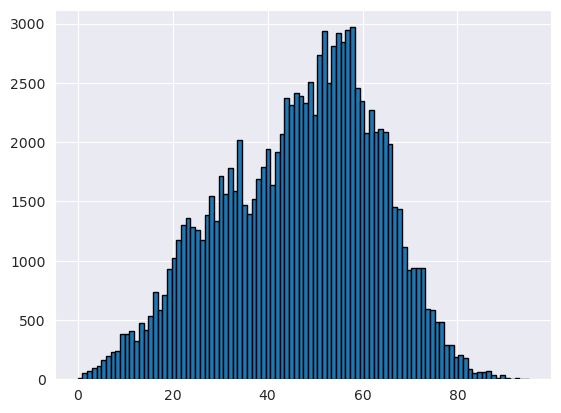

In [11]:
import matplotlib.pyplot as plt

patient_age = df["patient_age"]

plt.hist(patient_age, bins=patient_age.nunique(), edgecolor="black")
plt.show()

In [12]:
df["patient_gender"].value_counts()

M    63340
F    48780
Name: patient_gender, dtype: int64

In [13]:
df.head()

,image_name,findings,follow_up,patient_id,patient_age,patient_gender,view_pos,original_width,original_height,original_x_pixel_spacing,original_y_pixel_spacing
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [14]:
df["view_pos"].value_counts()

PA    67310
AP    44810
Name: view_pos, dtype: int64

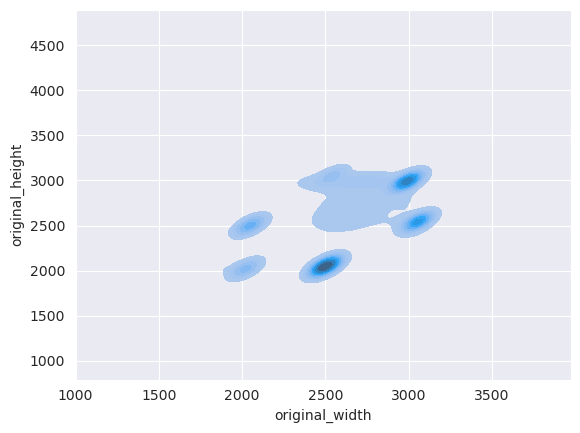

In [15]:
import seaborn as sns

sns.kdeplot(data=df, x="original_width", y="original_height", fill=True)
plt.show()

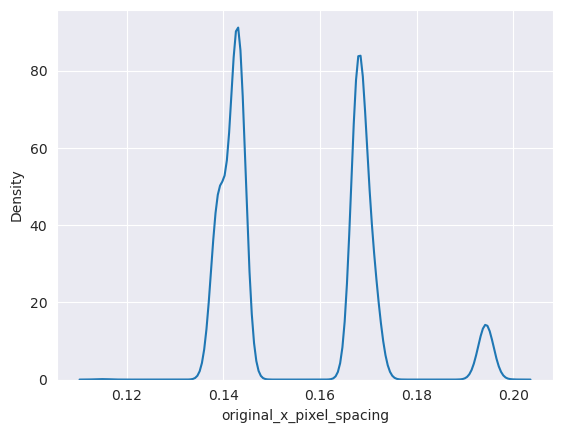

In [16]:
sns.kdeplot(data=df, x="original_x_pixel_spacing")
plt.show()

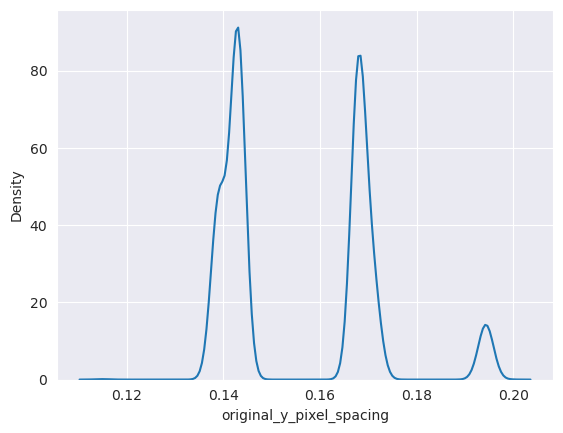

In [17]:
sns.kdeplot(data=df, x="original_y_pixel_spacing")
plt.show()

In [18]:
df["original_x_pixel_spacing"].cov(df["original_y_pixel_spacing"])

0.00026159204199039396

In [19]:
df[df["original_x_pixel_spacing"] != df["original_y_pixel_spacing"]]

,image_name,findings,follow_up,patient_id,patient_age,patient_gender,view_pos,original_width,original_height,original_x_pixel_spacing,original_y_pixel_spacing


In [20]:
sum(df["original_x_pixel_spacing"] - df["original_y_pixel_spacing"])

0.0

In [21]:
print("???")

???


In [22]:
findings = df["findings"]
findings.head()

0              Cardiomegaly
1    Cardiomegaly|Emphysema
2     Cardiomegaly|Effusion
3                No Finding
4                    Hernia
Name: findings, dtype: object

In [23]:
split_findings = findings.str.split("|")
split_findings.head()

0               [Cardiomegaly]
1    [Cardiomegaly, Emphysema]
2     [Cardiomegaly, Effusion]
3                 [No Finding]
4                     [Hernia]
Name: findings, dtype: object

In [24]:
findings_values = split_findings.explode().unique()
print(findings_values)
print(len(findings_values))

['Cardiomegaly' 'Emphysema' 'Effusion' 'No Finding' 'Hernia'
 'Infiltration' 'Mass' 'Nodule' 'Atelectasis' 'Pneumothorax'
 'Pleural_Thickening' 'Pneumonia' 'Fibrosis' 'Edema' 'Consolidation']
15


In [25]:
findings_dummies = findings.str.get_dummies("|")
pd.concat([findings, findings_dummies], axis=1)

,findings,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,Cardiomegaly,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Cardiomegaly|Emphysema,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Cardiomegaly|Effusion,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Hernia,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,Mass|Pneumonia,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
112116,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112117,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112118,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [26]:
pd.concat([df["image_name"], findings_dummies], axis=1)

,image_name,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_001.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
112116,00030802_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112117,00030803_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112118,00030804_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
